In [1]:
import pandas as pd
import string
from collections import defaultdict
import nltk
from nltk.corpus import stopwords

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
data = pd.read_csv("/content/gdrive/MyDrive/NLP Project/Data.csv")
data

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."
...,...,...,...,...,...,...
4994,4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,Chronic Sinusitis,"HISTORY:, I had the pleasure of meeting and e...",NaN
4995,4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,Kawasaki Disease - Discharge Summary,"ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH...","allergy / immunology, mucous membranes, conjun..."
4996,4996,A female for a complete physical and follow u...,Allergy / Immunology,Followup on Asthma,"SUBJECTIVE: , This is a 42-year-old white fema...",NaN
4997,4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,Asthma in a 5-year-old,"CHIEF COMPLAINT: , This 5-year-old male presen...",NaN


In [5]:
data.shape

(4999, 6)

In [6]:
data.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


# Keyword extraction

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Extracting important keywords

In [ ]:
word_counts = defaultdict(int)

stop_words = set(stopwords.words('english'))


# Iterate through each row in the 'transcription' column
for index, row in data.iterrows():
    # Check if the value is not NaN
    if pd.notna(row['transcription']):
        # Remove punctuation and split the transcription text into words
        translator = str.maketrans("", "", string.punctuation + string.digits)
        words = row['transcription'].translate(translator).split()

        # Iterate through each word and count capitalized words
        for word in words:
            # Check if the word is capitalized
            if word.isupper():
                word_counts[word] += 1


# Find the top 10 most frequently occurring capitalized words
top_20_words = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True)[:20])

print("Top 20 words")
# Print the top 10 capitalized words and their counts
for word, count in top_20_words.items():
    print(f"{word}: {count}")

Top 20 words
A: 5725
I: 5155
HISTORY: 3782
OF: 2999
DIAGNOSIS: 2642
PREOPERATIVE: 1634
DIAGNOSES: 1450
PROCEDURE: 1440
CC: 1267
X: 1235
IV: 1227
C: 1096
CT: 1057
L: 1023
PRESENT: 1002
ILLNESS: 997
PERFORMED: 966
FOR: 962
S: 960
MEDICAL: 949


In [ ]:
import pandas as pd
import re

def extract_keyword_detail(data, keyword):
    # Initialize a new column for the specified keyword details
    column_name = f"{keyword}_DETAIL"
    data[column_name] = 'N/A'

    # Define a function to extract the keyword details
    def extract_detail(text):
        pattern = re.compile(fr'{keyword}:(.*?)(?=\.,)', re.DOTALL | re.IGNORECASE)
        match = re.search(pattern, text)
        if match:
            return match.group(1).strip()
        else:
            return 'N/A'

    # Iterate through each row in the 'transcription' column
    for index, row in data.iterrows():
        # Check if the value is not NaN
        if pd.notna(row['transcription']):
            # Extract the keyword details
            detail = extract_detail(row['transcription'])
            data.at[index, column_name] = detail

    # Return the column name for reference
    return column_name

# Example usage:
keyword = 'PAST MEDICAL HISTORY'
new_column_name = extract_keyword_detail(data, keyword)


extracted_key_columns = ["PAST MEDICAL HISTORY", "SOCIAL HISTORY", "FAMILY HISTORY", "PREOPERATIVE DIAGNOSIS", "POSTOPERATIVE DIAGNOSIS", "PREOPERATIVE DIAGNOSES", "POSTOPERATIVE DIAGNOSES", "PROCEDURE", "DESCRIPTION OF PROCEDURE", "HISTORY OF PRESENT ILLNESS", "PROCEDURE PERFORMED"]
self_selected_key_columns = ["ALLERGIES", "OBJECTIVE","CURRENT MEDICATIONS", "CURRENT MEDICATION", "VITAL SIGNS", "LABORATORY DATA"]


keywords = list(set(extracted_key_columns + self_selected_key_columns))

for key in keywords:
  new_column_name = extract_keyword_detail(data, key)

In [ ]:
data.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords,PAST MEDICAL HISTORY_DETAIL,CURRENT MEDICATIONS_DETAIL,DESCRIPTION OF PROCEDURE_DETAIL,POSTOPERATIVE DIAGNOSIS_DETAIL,...,PROCEDURE PERFORMED_DETAIL,ALLERGIES_DETAIL,OBJECTIVE_DETAIL,CURRENT MEDICATION_DETAIL,VITAL SIGNS_DETAIL,SOCIAL HISTORY_DETAIL,LABORATORY DATA_DETAIL,FAMILY HISTORY_DETAIL,PREOPERATIVE DIAGNOSES_DETAIL,POSTOPERATIVE DIAGNOSES_DETAIL
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller...",N/A,N/A,N/A,N/A,...,N/A,", She has no known medicine allergies",",Vitals: Weight was 130 pounds and blood pres...",N/A,N/A,N/A,N/A,N/A,N/A,N/A
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh...",", He has difficulty climbing stairs, difficult...",", None",N/A,N/A,...,N/A,", He is allergic to Penicillin",N/A,N/A,N/A,", He is currently single. He has about ten dr...",N/A,", Heart disease in both grandfathers, grandmot...",N/A,N/A
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart...",", He has difficulty climbing stairs, difficult...",", Include Diovan, Crestor, and Tricor",N/A,N/A,...,N/A,N/A,N/A,N/A,N/A,", He is currently single. He drinks alcohol t...",N/A,", Obesity, heart disease, and diabetes. Famil...",N/A,N/A
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple...",N/A,N/A,N/A,N/A,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo...",N/A,N/A,N/A,N/A,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A


In [ ]:
data.columns

Index(['Unnamed: 0', 'description', 'medical_specialty', 'sample_name',
       'transcription', 'keywords', 'PAST MEDICAL HISTORY_DETAIL',
       'CURRENT MEDICATIONS_DETAIL', 'DESCRIPTION OF PROCEDURE_DETAIL',
       'POSTOPERATIVE DIAGNOSIS_DETAIL', 'PROCEDURE_DETAIL',
       'HISTORY OF PRESENT ILLNESS_DETAIL', 'PREOPERATIVE DIAGNOSIS_DETAIL',
       'PROCEDURE PERFORMED_DETAIL', 'ALLERGIES_DETAIL', 'OBJECTIVE_DETAIL',
       'CURRENT MEDICATION_DETAIL', 'VITAL SIGNS_DETAIL',
       'SOCIAL HISTORY_DETAIL', 'LABORATORY DATA_DETAIL',
       'FAMILY HISTORY_DETAIL', 'PREOPERATIVE DIAGNOSES_DETAIL',
       'POSTOPERATIVE DIAGNOSES_DETAIL'],
      dtype='object')

In [ ]:
import pandas as pd

data['PREOPERATIVE_DIAGNOSIS_COMBINED'] = data['PREOPERATIVE DIAGNOSIS_DETAIL'].fillna('') + data['PREOPERATIVE DIAGNOSES_DETAIL'].fillna('')

# Now you can drop the individual columns if needed
data.drop(['PREOPERATIVE DIAGNOSIS_DETAIL', 'PREOPERATIVE DIAGNOSES_DETAIL'], axis=1, inplace=True)

data['PREOPERATIVE_DIAGNOSIS_COMBINED'] = data['PREOPERATIVE_DIAGNOSIS_COMBINED'].replace('N/AN/A', 'N/A')

# Assuming 'data' is your DataFrame
data['POSTOPERATIVE_DIAGNOSIS_COMBINED'] = data['POSTOPERATIVE DIAGNOSIS_DETAIL'].fillna('') + data['POSTOPERATIVE DIAGNOSES_DETAIL'].fillna('')

# Now you can drop the individual columns if needed
data.drop(['POSTOPERATIVE DIAGNOSIS_DETAIL', 'POSTOPERATIVE DIAGNOSES_DETAIL'], axis=1, inplace=True)

data['POSTOPERATIVE_DIAGNOSIS_COMBINED'] = data['POSTOPERATIVE_DIAGNOSIS_COMBINED'].replace('N/AN/A', 'N/A')



data['CURRENT MEDICATIONS_DETAIL_COMBINED'] = data['CURRENT MEDICATIONS_DETAIL'].fillna('') + data['CURRENT MEDICATION_DETAIL'].fillna('')

# Now you can drop the individual columns if needed
data.drop(['CURRENT MEDICATIONS_DETAIL', 'CURRENT MEDICATION_DETAIL'], axis=1, inplace=True)

data['CURRENT MEDICATIONS_DETAIL_COMBINED'] = data['CURRENT MEDICATIONS_DETAIL_COMBINED'].replace('N/AN/A', 'N/A')

In [ ]:
data.head()


,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords,PAST MEDICAL HISTORY_DETAIL,DESCRIPTION OF PROCEDURE_DETAIL,PROCEDURE_DETAIL,HISTORY OF PRESENT ILLNESS_DETAIL,PROCEDURE PERFORMED_DETAIL,ALLERGIES_DETAIL,OBJECTIVE_DETAIL,VITAL SIGNS_DETAIL,SOCIAL HISTORY_DETAIL,LABORATORY DATA_DETAIL,FAMILY HISTORY_DETAIL,PREOPERATIVE_DIAGNOSIS_COMBINED,POSTOPERATIVE_DIAGNOSIS_COMBINED,CURRENT MEDICATIONS_DETAIL_COMBINED
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller...",N/A,N/A,N/A,N/A,N/A,", She has no known medicine allergies",",Vitals: Weight was 130 pounds and blood pres...",N/A,N/A,N/A,N/A,N/A,N/A,N/A
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh...",", He has difficulty climbing stairs, difficult...",N/A,N/A,N/A,N/A,", He is allergic to Penicillin",N/A,N/A,", He is currently single. He has about ten dr...",N/A,", Heart disease in both grandfathers, grandmot...",N/A,N/A,", NoneN/A"
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart...",", He has difficulty climbing stairs, difficult...",N/A,N/A,", I have seen ABC today. He is a very pleasan...",N/A,N/A,N/A,N/A,", He is currently single. He drinks alcohol t...",N/A,", Obesity, heart disease, and diabetes. Famil...",N/A,N/A,", Include Diovan, Crestor, and TricorN/A"
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple...",N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo...",N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A


In [ ]:
import numpy as np

# Replace 'N/A' with NaN
data.replace('N/A', np.nan, inplace=True)

# Get the number of non-N/A rows for all columns
non_na_counts = data.count()
print(non_na_counts)


Unnamed: 0                             4999
description                            4999
medical_specialty                      4999
sample_name                            4999
transcription                          4966
keywords                               3931
PAST MEDICAL HISTORY_DETAIL             830
DESCRIPTION OF PROCEDURE_DETAIL         266
PROCEDURE_DETAIL                       1466
HISTORY OF PRESENT ILLNESS_DETAIL       968
PROCEDURE PERFORMED_DETAIL              599
ALLERGIES_DETAIL                        881
OBJECTIVE_DETAIL                        162
VITAL SIGNS_DETAIL                      779
SOCIAL HISTORY_DETAIL                   831
LABORATORY DATA_DETAIL                  263
FAMILY HISTORY_DETAIL                   643
PREOPERATIVE_DIAGNOSIS_COMBINED        1565
POSTOPERATIVE_DIAGNOSIS_COMBINED       1538
CURRENT MEDICATIONS_DETAIL_COMBINED     309
dtype: int64


In [ ]:
data.to_csv("/content/gdrive/My Drive/NLP Project/Structed Data - Regex.csv", index=False)

# Word Cloud

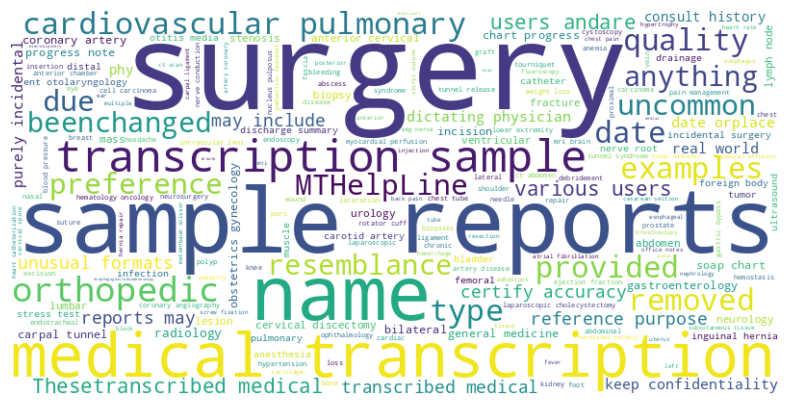

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all keywords into a single string
all_keywords = ' '.join(data['keywords'].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_keywords)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


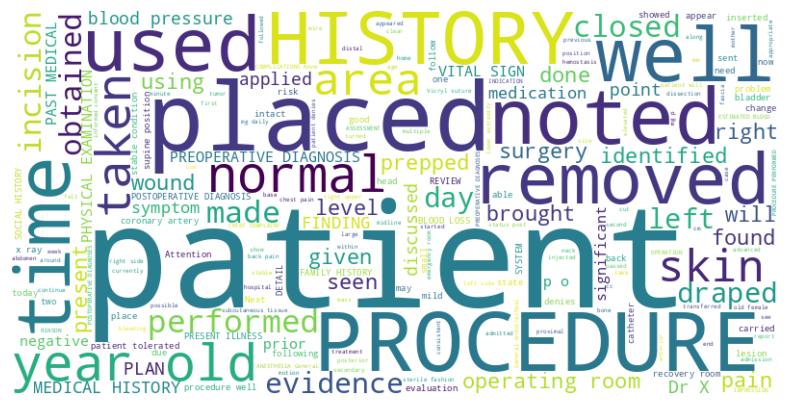

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all keywords into a single string
all_keywords = ' '.join(data['transcription'].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_keywords)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
